In [1]:
import ROOT
from ROOT import gStyle

Welcome to JupyROOT 6.28/00


In [2]:
myFile_bkg = ROOT.TFile.Open("/Users/bertabeltran/MIST/data/DShaped/DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1/FILTERED/HcompassF_DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1_20230824_140340.root")

In [3]:
myFile_bkg.ls()

TFile**		/Users/bertabeltran/MIST/data/DShaped/DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1/FILTERED/HcompassF_DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1_20230824_140340.root	
 TFile*		/Users/bertabeltran/MIST/data/DShaped/DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1/FILTERED/HcompassF_DShapedHolevsDShapedNoHole_coin_SiPMV1_2Ch0_0Ch1_20230824_140340.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title


In [4]:
dir_bkg = myFile_bkg.GetDirectory("Energy");

In [5]:
dir_bkg.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


In [6]:
hist_bkg1 = dir_bkg.Get("_F_EnergyCH0@DT5751_1615;1")

In [7]:
hist_bkg2 = dir_bkg.Get("_F_EnergyCH1@DT5751_1615")

python ERROR: cannot open image file "/Users/bertabeltran/SMUT/data/HolesVsNoHoles.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /Users/bertabeltran/SMUT/data/HolesVsNoHoles.png


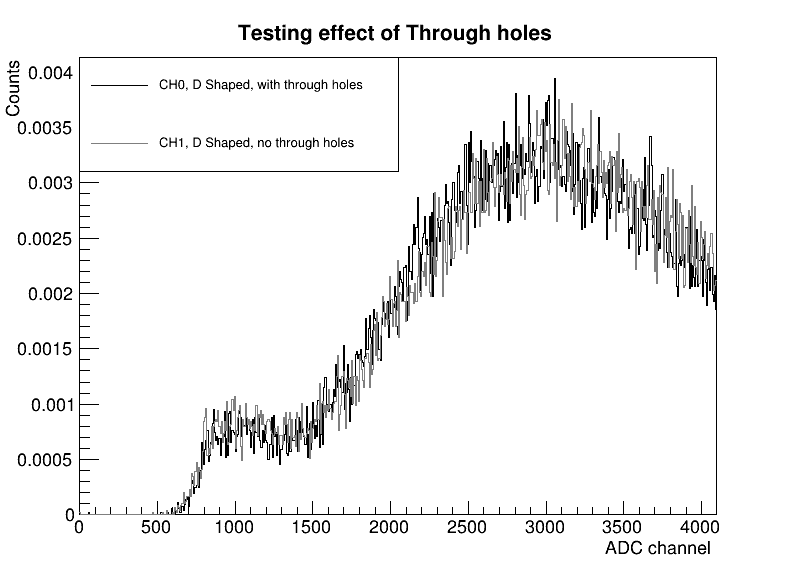

In [8]:

c = ROOT.TCanvas("myCanvasName","myCanvasName",800,600)
hist_bkg1.Rebin(7)
#hist_coin.Rebin(4)
hist_bkg1.SetFillColor(0)
hist_bkg1.SetLineColor(1)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)
hist_bkg1.SetNormFactor(1)
hist_bkg1.Draw()
hist_bkg1.GetYaxis().SetTitleOffset(1.5) #1.2

hist_bkg2.Rebin(7)
hist_bkg2.SetLineColor(14)
hist_bkg2.SetFillColor(0)
hist_bkg2.SetNormFactor(1)
hist_bkg2.Draw("same")
#c.SetLogy()
gStyle.SetOptStat(0)

leg = ROOT.TLegend(.1,.7,.5,.9)
leg.AddEntry(hist_bkg1,"CH0, D Shaped, with through holes ","L")
leg.AddEntry(hist_bkg2,"CH1, D Shaped, no through holes","L")
leg.Draw()

tex=ROOT.TLatex(0.3,0.93,"Testing effect of Through holes ");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c.Draw()
c.SaveAs("/Users/bertabeltran/MIST/data/HolesVsNoHoles.png");